<center>Заметка 2. 	Повторение. Основные распределения, статистики, гипотезы.</center>
<center>курса <q>Прикладной статистический анализ данных</q>.</center>
<center>Версия 1. 2020 г.</center>

# Основные понятия

![Случайность](https://user-images.githubusercontent.com/60938140/74263436-d9ac0900-4d0f-11ea-8929-bfeecf44fabc.png)

<b>Дискретная</b> случайная величина $X$ принимает счётное множество значений $A = \{a_1, a_2,...\}$ с вероятностями $p_1,p_2, ..., \sum_i p_i = 1$. 

$f_X(a_i) = P(X=a_i)=p_i$ - <b>функция вероятности</b>.

<b>Непрерывная</b> случайная величина задается с помощью функции <b>распределения</b>:
    $$F_X(x)=P(X\le x)$$
или <b>плотности распределения</b>:  
    $$f_X(x): \int\limits_a^{b} f_x(x)dx = P(a \le X \le b)$$

## Характеристики распределений

- <b>Мат.ожидание</b> - среднее значение $X$:  
$$\mathbb{E}X = \int xdF(x)$$

- <b>Дисперсия</b> - мера разброса $X$:  
$$\mathbb{D}X = \mathbb{E}((X-\mathbb{E}X)^2)$$

- <b>Квантиль</b> порядка $\alpha \in (0,1)$:
$$X_\alpha: P(X \le X_\alpha) \ge \alpha, \quad P(X \ge X_\alpha) \ge 1-\alpha$$
- <b>Медиана</b> - квантиль порядка 0.5, центральное значение   
распределения:  
$$\operatorname{med} X: P(X \le \operatorname{med} X) \ge 0.5, \quad P(X \ge \operatorname{med} X) \ge 0.5$$
- <b>Интерквартильный размах</b>:
$$IQR . = X_{0.75} - X_{0.25}$$
- <b>Мода</b> - точка максимума функции вероятности или плотности:
$$\operatorname{mode} X = \operatorname{argmax}_x f(x)$$
- <b>Коэффициент ассиметрии</b> (skewness)
$$\gamma_1 = \mathbb{E}\bigg(\frac{X- \mathbb{E}X}{\sqrt{\mathbb{D}X}}\bigg)^3$$

In [1]:
from scipy.stats import skewnorm, skew
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random


RANDOM_SEED = 45135
np.random.seed(RANDOM_SEED)

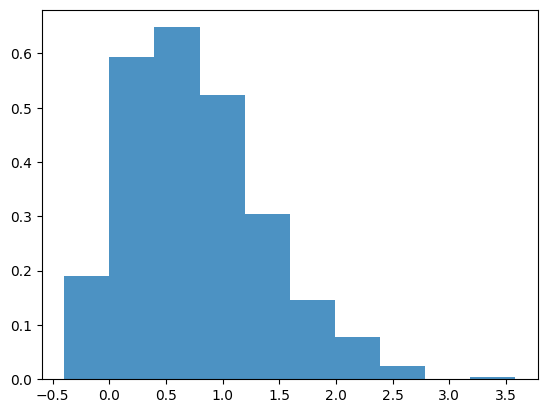

In [2]:
array_skew = skewnorm.rvs(5, size=1000)
plt.hist(array_skew, density=True, alpha=0.8)
plt.show()

In [3]:
gamma1 = np.mean(((array_skew-np.mean(array_skew))/(np.std(array_skew))) **3)
gamma1

0.8219898049651565

In [4]:
skew(array_skew)

0.8219898049651567

- <b>Коэффициент эксцесса</b> (excess, без вычитания тройки - kurtosis) 
$$\gamma_2 = \frac {\mathbb{E}(X-\mathbb{E}X)^4}{(\mathbb{D}X)^2}-3$$

In [5]:
from scipy.stats import kurtosis 
from scipy.stats import logistic, laplace, norm
x = np.linspace(-5,5,1000)

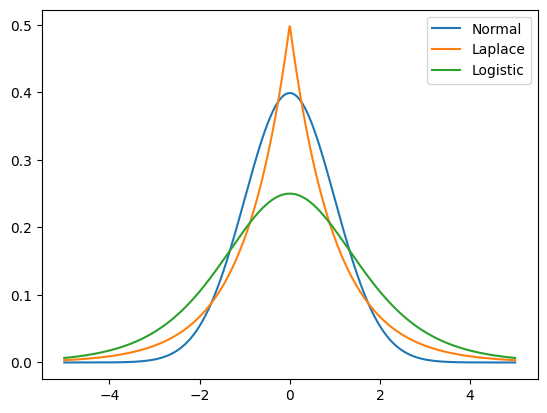

In [6]:
plt.plot(x, norm.pdf(x), label = 'Normal')
plt.plot(x, laplace.pdf(x), label = 'Laplace')
plt.plot(x, logistic.pdf(x), label = 'Logistic')
plt.legend(loc='best')
plt.show()

## Статистики

### Нормальное распределение

$X \in \mathbb{R} \sim N(\mu,\sigma^2),\quad \sigma^2 > 0$

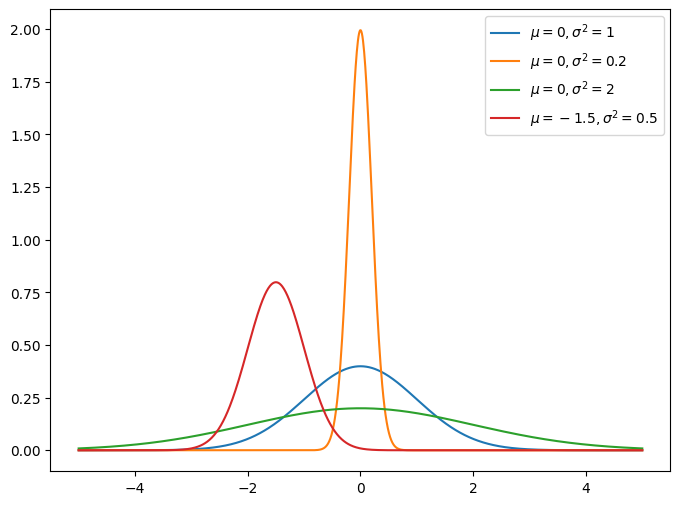

In [7]:
plt.figure(figsize=(8,6))
plt.plot(x, norm.pdf(x,0,1), label = '$\mu = 0, \sigma^2 = 1$')
plt.plot(x, norm.pdf(x,0,0.2), label = '$\mu = 0, \sigma^2 = 0.2$')
plt.plot(x, norm.pdf(x,0,2), label = '$\mu = 0, \sigma^2 = 2$')
plt.plot(x, norm.pdf(x,-1.5,0.5), label = '$\mu = -1.5, \sigma^2 = 0.5$')
plt.legend(loc='best')
plt.show()

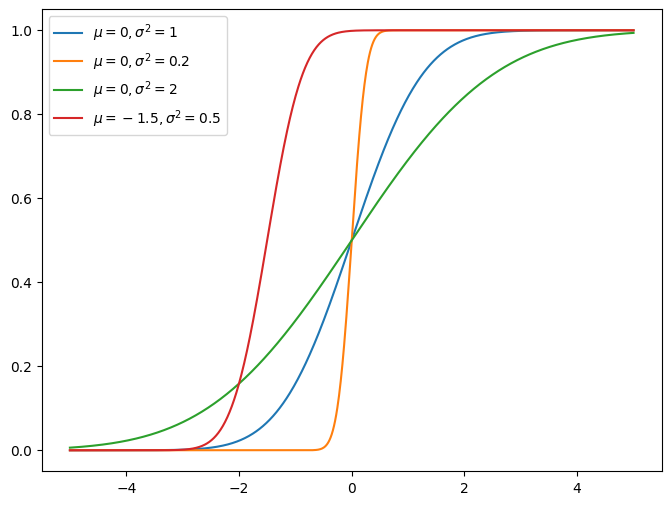

In [8]:
plt.figure(figsize=(8,6))
plt.plot(x, norm.cdf(x,0,1), label = '$\mu = 0, \sigma^2 = 1$')
plt.plot(x, norm.cdf(x,0,0.2), label = '$\mu = 0, \sigma^2 = 0.2$')
plt.plot(x, norm.cdf(x,0,2), label = '$\mu = 0, \sigma^2 = 2$')
plt.plot(x, norm.cdf(x,-1.5,0.5), label = '$\mu = -1.5, \sigma^2 = 0.5$')
plt.legend(loc='best')
plt.show()

- Предельное распределение суммы слабо взаимозависимых сл. в.   

- $\mathbb{E}X=\operatorname{med}X=\operatorname{mode}X=\mu, \mathbb{D}X=\sigma^2$, все моменты более высокого порядка нулевые  

- Пусть $X_1, \ldots, X_n$ независимы, $X_i \sim N(\mu_i, \sigma_{i}^2)$, тогда $\forall a_i, \ldots, a_n$  
$$\sum\limits_{i=1}^{n} \alpha_i X_i \sim  N\bigg(\sum\limits_{i=1}^n a_i \mu_i, \sum\limits_{i=1}^n a_{i}^2 \sigma^{2}_i\bigg)$$  

- Центральная предельная теорема: пусть $X_1, \ldots, X_n$ i.i.d. с $\mathbb{E}X$ и
    $\mathbb{D}X < \infty$, тогда  
    $$\frac{1}{n}\sum\limits_{i=1}^{n} X_i\sim\approx N \bigg(\mathbb{E}X, \frac{\mathbb{D}X}{n}\bigg)$$  
    
- Пример: погрешность измерения

### Распределение хи-квадрат

$X \in \mathbb{R}_+ \sim \chi^{2}_{k}, k \in \mathbb{N}$

In [9]:
from scipy.stats import chi2

In [10]:
xchi = np.linspace(0,10,1000)

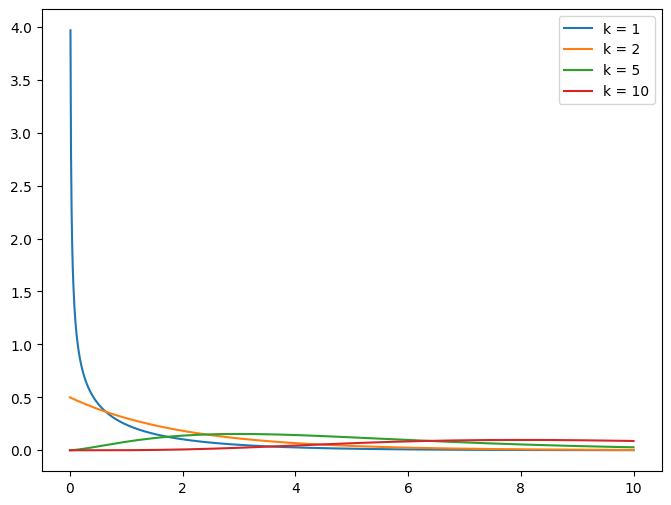

In [11]:
plt.figure(figsize=(8,6))
plt.plot(xchi, chi2.pdf(xchi,1), label = 'k = 1')
plt.plot(xchi, chi2.pdf(xchi,2), label = 'k = 2')
plt.plot(xchi, chi2.pdf(xchi,5), label = 'k = 5')
plt.plot(xchi, chi2.pdf(xchi,10), label = 'k = 10')
plt.legend(loc='best')
plt.show()

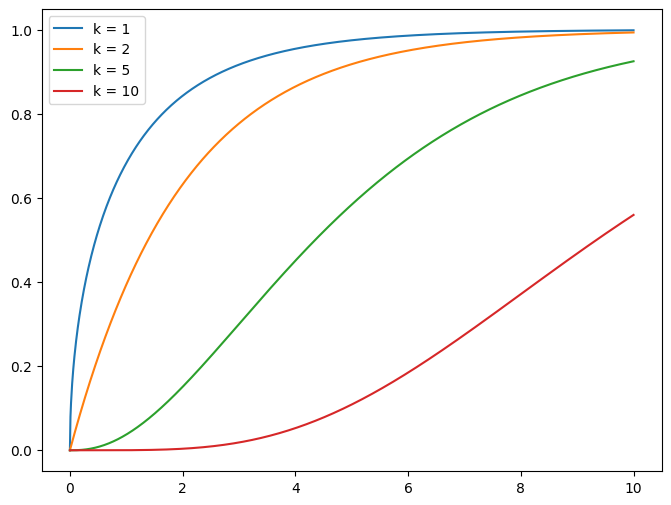

In [12]:
plt.figure(figsize=(8,6))
plt.plot(xchi, chi2.cdf(xchi,1), label = 'k = 1')
plt.plot(xchi, chi2.cdf(xchi,2), label = 'k = 2')
plt.plot(xchi, chi2.cdf(xchi,5), label = 'k = 5')
plt.plot(xchi, chi2.cdf(xchi,10), label = 'k = 10')
plt.legend(loc='best')
plt.show()

- Пусть $X_1,\ldots,X_k$ - i.i.d., $\quad X_i \sim N(0,1)$, тогда
$$\sum\limits_{i=1}^{n} X^{2}_i \sim \chi^{2}_k$$  
- Пример: нормированная выборочная дисперсия $$(n-1)\frac{S^{2}_n}{\sigma^2} \sim \chi^2_{n-1}$$

### Распределение Стьюдента

$X \in \mathbb{R} \sim St(v), v >0$

In [13]:
from scipy.stats import t

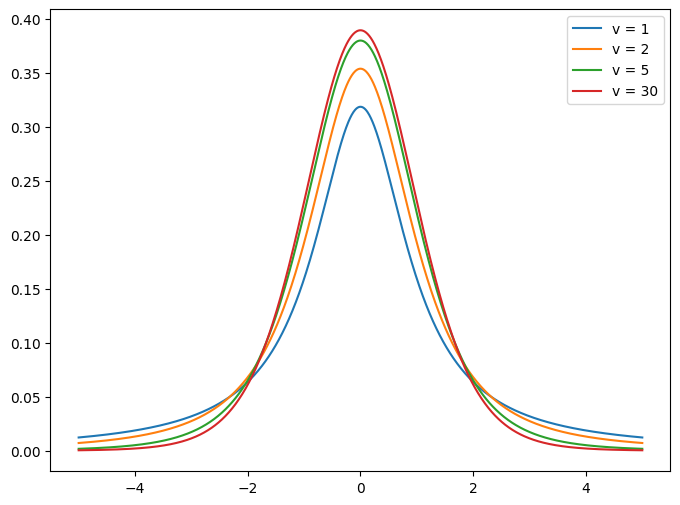

In [14]:
plt.figure(figsize=(8,6))
plt.plot(x, t.pdf(x,1), label = 'v = 1')
plt.plot(x, t.pdf(x,2), label = 'v = 2')
plt.plot(x, t.pdf(x,5), label = 'v = 5')
plt.plot(x, t.pdf(x,10), label = 'v = 30')
plt.legend(loc='best')
plt.show()

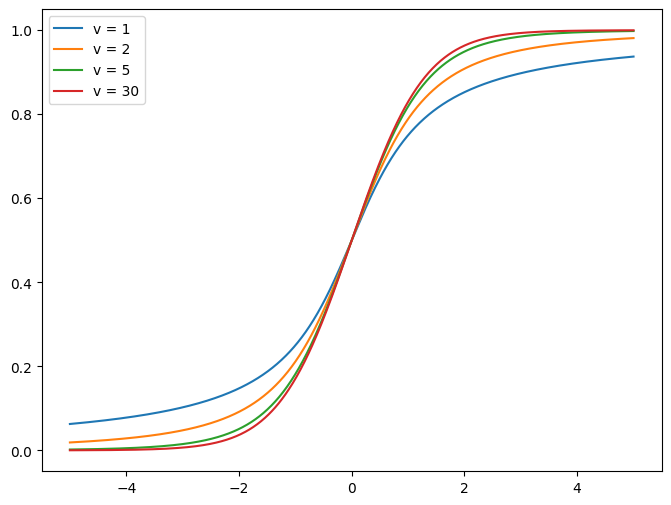

In [15]:
plt.figure(figsize=(8,6))
plt.plot(x, t.cdf(x,1), label = 'v = 1')
plt.plot(x, t.cdf(x,2), label = 'v = 2')
plt.plot(x, t.cdf(x,5), label = 'v = 5')
plt.plot(x, t.cdf(x,10), label = 'v = 30')
plt.legend(loc='best')
plt.show()

- $\mathbb{E}X=0$ при $v>1$, $\operatorname{med}X=\operatorname{mode}X=0$
- Пусть $Z \sim N(0,1)$ и $V \sim \chi^{2}_{v}$, тогда
$$T = \frac{Z}{\sqrt{V/v}} \sim St(v)$$
- Если $X \sim St(v)$, то 
$$Y = \lim\limits_{v \to \infty }X \sim N(0,1)$$
- Возникает при оценке среднего значения сл. в. с неизвестной дисперсией

## Статистики

$F_n(x) = \frac{1}{n} \sum\limits_{i=1}^{n}[X_i \le x]$ - эмпирическая функция распределения (ECDF). 

Статистика $T(X^n)$ - любая измеримая функция выборки.
- выборочное среднее:
$$\bar{X} = \frac{1}{n}\sum\limits_{i=1}^n X_i$$
- выборочная дисперсия:
$$S^2 = \frac{1}{n-1}\sum\limits_{i=1}^{n}(X_i - \bar{X})^2$$
Вариационный ряд:
$$X_{(1)} \le X_{(2)} \le \ldots \le X_{(n)}$$
Ранг элемента выборки X_i:
$$\operatorname{rank}(X_i) = r: X_i = X_{(r)}$$
- $k$-я порядковая статистика: $X_{(k)}$
- выборочный $\alpha$-квантиль: $X_{([n\alpha])}$
- выборочный интерквартильный размах
$$IQR_n = X_{([0.75n])} - X_{([0.25n])}$$

## Оценки

### Оценки центральной тенденции

Выборочное среднее — среднее арифметическое по выборке.  
Выборочная медиана — центральный элемент вариационного ряда.   
Выборочная мода — самое распространённое значение в выборке.  

In [16]:
import statistics
income = [45000, 
          15000,
          10000, 10000,
          5700, 
          5000,5000,5000,
          3700, 3700, 3700, 3700,
          3000,
          2000, 2000, 2000, 2000, 2000, 2000,
          2000, 2000, 2000, 2000, 2000, 2000
         ]

(array([21.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 2000.,  6300., 10600., 14900., 19200., 23500., 27800., 32100.,
        36400., 40700., 45000.]),
 <BarContainer object of 10 artists>)

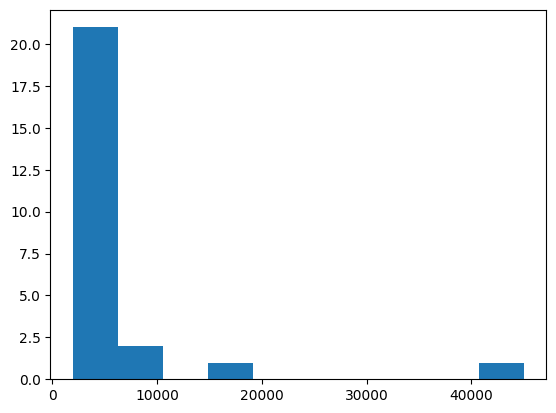

In [17]:
plt.hist(income)

In [18]:
print('Arithmetical average ', round(statistics.mean(income)))
print('Median ', round(statistics.median(income)))
print('Mode ', round(statistics.mode(income)))

Arithmetical average  5700
Median  3000
Mode  2000


Huff D. How To Lie With Statistics, 1954.

### Об ограниченности статистик

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import *
data = pd.read_csv('Graphs.csv', sep = ';', decimal=',')
data['y1-3'] = data['y1'] + data['y2'] + data['y3']

Вычислите среднее арифметическое, дисперсию, корреляцию между $x_i$ и $y_i$. Почему вы получаете такие значения? Обоснуйте ваши суждения с помощью диаграммы рассеяния.

In [20]:
ans = data.describe().loc[['mean', 'std']]
ans.loc['var'] = ans.loc['std'] ** 2
ans.drop('std', inplace=True)
ans

,x1-3,y1,y2,y3,x4,y4,y1-3
mean,9.0,7.500909,7.500909,7.50000,9.0,7.500909,22.501818
var,11.0,4.127269,4.127629,4.12262,11.0,4.123249,27.286076


In [21]:
data.corr()

,x1-3,y1,y2,y3,x4,y4,y1-3
x1-3,1.000000,0.816421,0.816237,0.816287,-0.500000,-0.314047,0.952279
y1,0.816421,1.000000,0.750005,0.468717,-0.529093,-0.489116,0.862817
y2,0.816237,0.750005,1.000000,0.587919,-0.718437,-0.478095,0.909155
y3,0.816287,0.468717,0.587919,1.000000,-0.344661,-0.155472,0.799659
x4,-0.500000,-0.529093,-0.718437,-0.344661,1.000000,0.816521,-0.619172
y4,-0.314047,-0.489116,-0.478095,-0.155472,0.816521,1.000000,-0.436608
y1-3,0.952279,0.862817,0.909155,0.799659,-0.619172,-0.436608,1.000000


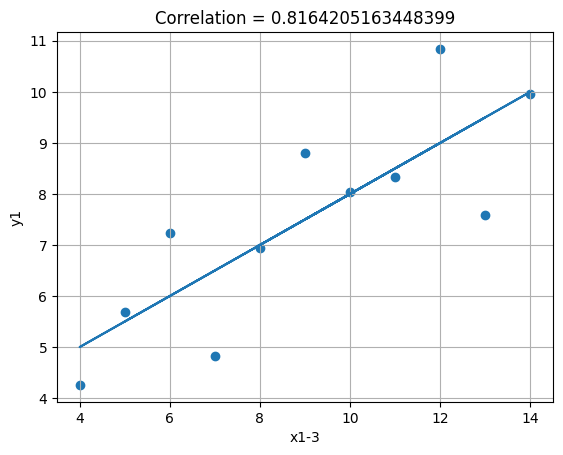

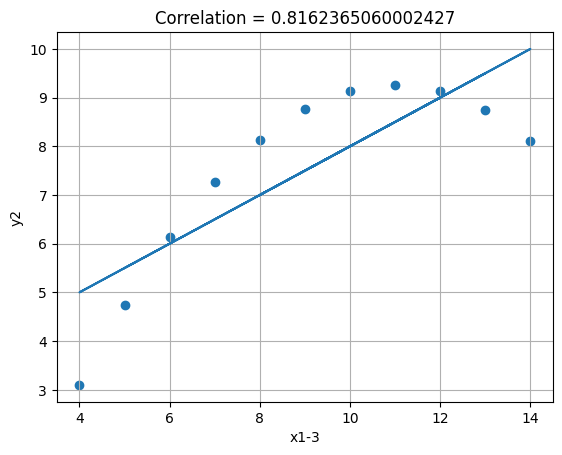

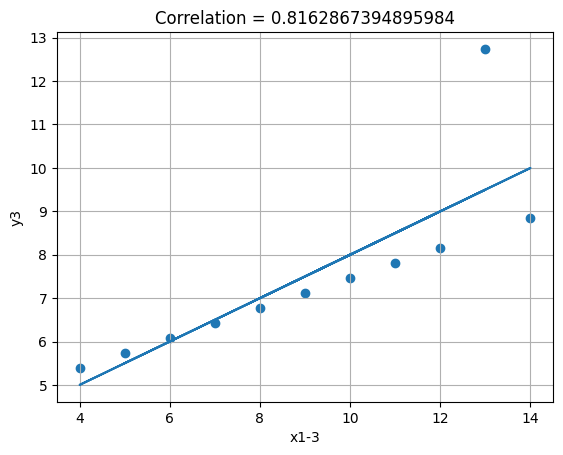

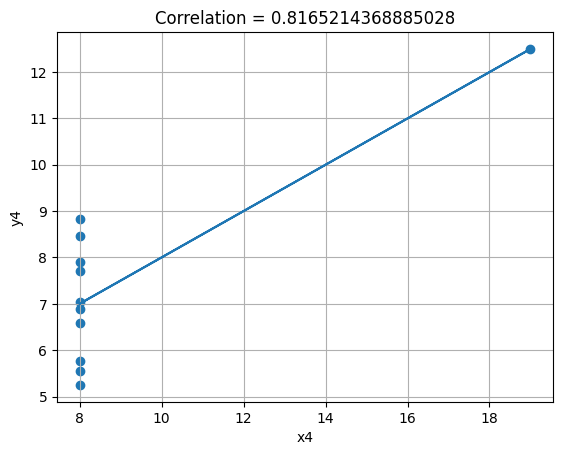

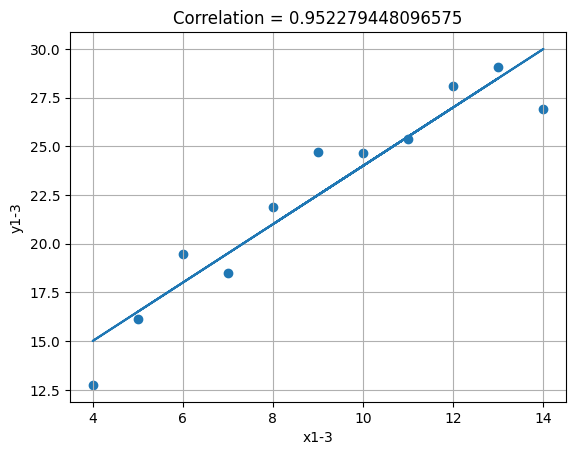

In [22]:
for x, y in [('x1-3', 'y1'), ('x1-3', 'y2'), ('x1-3', 'y3'), ('x4', 'y4'), ('x1-3', 'y1-3')]:
    X, Y = data[x].values.reshape(-1, 1), data[y].values
    model = LinearRegression(fit_intercept=True)
    model.fit(X, Y)
    plt.title(f"Correlation = {data.corr().loc[x, y]}")
    plt.plot(X, model.predict(X))
    plt.scatter(X, data[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

Anscombe F.J. (1973). Graphs in Statistical Analysis. American Statistician, 27(1): 17–21.

## Интервальные оценки

Доверительный интервал:
    $$P(\theta \in [C_L, C_U])  \ge 1-\alpha$$
$1-\alpha$ - уровень доверия,  
$C_L, C_U$ - нижний и верхний доверительные пределы.

Как интерпретировать?

### Для нормального распределения

$X \in \mathbb{R} \sim N(\mu,\sigma^2),\quad \sigma^2 > 0, X^n = (X_1, \ldots, X_n)$,  

$\bar{X}_n$ - оценка $\mathbb{E}X = \mu$.

ЦПТ: $\bar{X}_n \sim N(\mu, \frac{\sigma^2}{n}$), тогда
$$P\bigg(\mu - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le \bar{X}_n \le \mu + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\bigg) = 1 - \alpha$$ 
доверительный интервал:
$$P\bigg(\bar{X}_n  - z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \le  \mu \le \bar{X}_n  + z_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}\bigg)  = 1 - \alpha$$,  
где $z_{1-\frac{\alpha}{2}}$ - квантиль стандартного нормального распределения. 

### Для ненормальных распределений

ЦПТ:
    если $X^n$ - выборка из $F(x),  F(x)$ не слишком скошено $n>30$, то
    $$\bar{X}_n \sim\approx  N\bigg(\mathbb{E}X, \frac{\mathbb{D}X}{n}\bigg)$$
    доверительный интервал для $\mathbb{E}X$, если известна дисперсия
    
$$P\bigg(\bar{X}_n  - z_{1-\frac{\alpha}{2}} \sqrt{\frac{\mathbb{D}X }{n}} \le  \mathbb{E}X \le \bar{X}_n  + z_{1-\frac{\alpha}{2}}\sqrt{\frac{\mathbb{D}X }{n}}\bigg)  \approx 1 - \alpha$$  
    

$$P\bigg(\bar{X}_n  - t_{n-1,1-\frac{\alpha}{2}} \frac{S_n}{\sqrt{n}} \le   \mathbb{E}X \le \bar{X}_n  + t_{n-1,1-\frac{\alpha}{2}} \frac{S_n}{\sqrt{n}}\bigg)  \approx 1 - \alpha$$
где $t_{n-1,1-\frac{\alpha}{2}}$ -  квантиль распределения Стьюдента с $n - 1$ степенью свободы.

### Построение доверительных интервалов

Имеется популяция с неизвестным средним $\mu$. 

Как можно оценить $F_{\hat{\theta}_n}$ - выборочное распределение статистики $\hat{\theta}_n$?

- <b>Параметрический метод</b> (если имеется нормальная популяция):  

    Сделать предположение, что $X$ распределена по закону $F_X (x)$, при
выполнении которого закон распределения $\hat{\theta}_n$ известен.

- <b>Наивный метод</b>:  

    Извлечь из генеральной совокупности $N$ выборок объёма $n$ и оценить выборочное распределение $\hat{\theta}_n$ эмпирическим.

- <b>Бутстреп</b>:  

    Сгенерировать $N$ «псевдовыборок» объёма $n$ и оценить выборочное распределение $\hat{\theta}_n$ «псевдоэмпирическим».   
    Лучшая оценка $F_X(x)$, которая у нас есть - $F_{X^n}(x)$.

### Бутстреп-распределение

$X^{1∗},\ldots,X^{N∗}$ - бутстреп-псевдовыборки из $X^n$ объёма $n$, 

$\hat{\theta}^{1*}_n, \ldots, \hat{\theta}^{N*}_n$ - значения статистики на них,

$F_{\hat{\theta}_n}^{boot}(x)$ — бутстреп-распределение $\hat{\theta}_n$ — эмпирическая функция распределения, построенная по значениям статистики на псевдовыборках.

По $F_{\hat{\theta}_n}^{boot}(x)$ строятся доверительные интерваля для $\theta$:

- Стьюдентизированный бутстреп  
    Посчитаем $S^{boot}_n$ - выборочное стандартное отклонение $\hat{\theta}_n$ на псевдовыборках 
    $$P(\hat{\theta}_n - t_{n-1,1-\frac{\alpha}{2}}S^{boot}_n \le \theta \le \hat{\theta}_n + t_{n-1,1-\frac{\alpha}{2}}S^{boot}_n) \approx 1 -\alpha$$
    
- Базовый бутстреп
$$P\bigg( \Big(F_{\hat{\theta}_n}^{boot}\Big)^{-1}\Big(\frac{\alpha}{2}\Big) \le \theta \le \Big(F_{\hat{\theta}_n}^{boot}\Big)^{-1}\Big(1 - \frac{\alpha}{2}\Big)\bigg) \approx 1 -\alpha$$


Свойства бутстрепа:
- асимптотическая состоятельность
- простота использования даже для самых сложных статистик
- плохо работает для статистик, значение которых зависит от небольшого числа элементов выборки

## Использование t-критерия Стьюдента

Одновыборочные задачи:   
$X^n \sim N(\mu, \sigma^2)$       
$H_0: \mu = \mu_0,   
\quad \sigma$ - неизвестна

Двухвыборочные задачи:  
$X^{n_1}_1 \sim N(\mu_1, \sigma^2_{1}), \quad X^{n_2}_2 \sim N(\mu_2, \sigma^2_{2})$
- $H_0: \mu_1 = \mu_2$  
    $X_1, X_2$ независимые  
    $\sigma_1, \sigma_2$ неизвестны
- $H_0: \sigma_1 = \sigma_2$